In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [8]:
dataset = pd.read_csv('train_data.csv')
# dataset.head()
n = dataset['TrainNo'].tolist()
n

[12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12004,
 12005,
 12006,
 12007,
 12008,
 12009,
 12010,
 12011,
 12012,
 12013,
 12014,
 12015,
 12016,
 12017,
 12018,
 12420,
 12421,
 12422,
 12423,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12439,
 12440,
 12441,
 12442,
 12443,
 12444,
 12445,
 12446,
 12447,
 12554,
 12555,
 12556,
 12557,
 12558,
 12559,
 12560,
 12561,
 12562,
 12563,
 12564,
 12565,
 12566,
 12567,
 12568,
 12569,
 12570,
 12571,
 12572,
 12573,
 12574,
 12575,
 12576,
 12577,
 12578,
 12579,
 12580,
 12581,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 18101,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12439,
 12440,
 12441,
 12442,
 12443,


In [163]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, -1].values

In [164]:
X[53]

array([1, 0, 1, 5], dtype=int64)

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#days basis
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [166]:
X[53] #first 7 are days, type, distance, region

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])

In [167]:
#region basis
ct2 = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))

In [168]:
X[53]   #first 3 are regions, next 7 are days, type, distance, region

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [169]:
y[53]

55

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [172]:
X_test[10]

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [173]:
print(y_test[10])

19


In [174]:
y_pred = regressor.predict(X_test)
# print(y_pred)

In [175]:
x = [[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]]
regressor.predict(x)[0]

31.0

Text(0.5, 1.0, 'Actual vs Predicted')

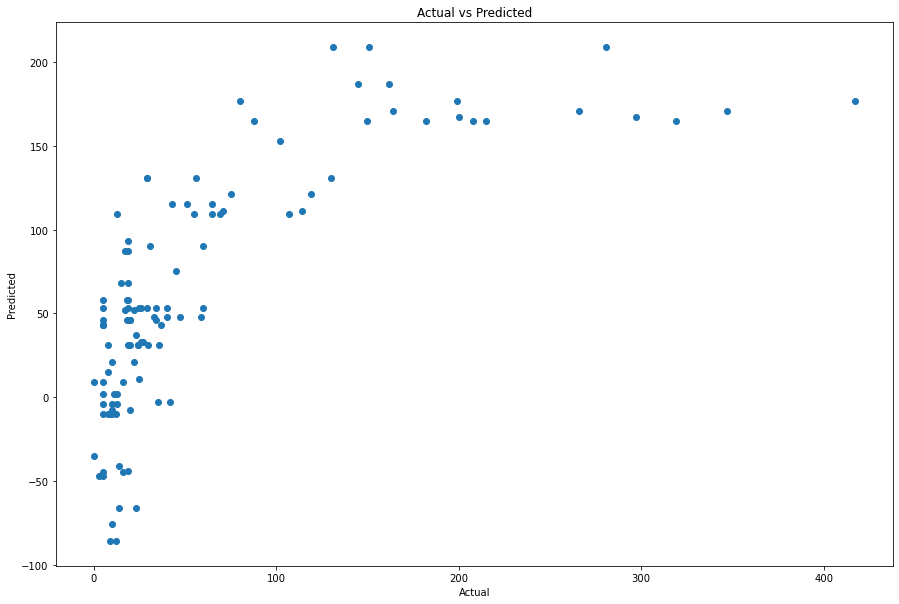

In [178]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [179]:
y_pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Values': y_pred, 'Difference':y_test-y_pred})
y_pred_df[10:20]

,Actual Value,Predicted Values,Difference
10,19,31.0,-12.0
11,164,171.0,-7.0
12,19,68.0,-49.0
13,40,48.0,-8.0
14,266,171.0,95.0
15,27,33.0,-6.0
16,29,131.0,-102.0
17,36,31.0,5.0
18,23,37.0,-14.0
19,10,21.0,-11.0


In [181]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 5.86928234e+15  5.86928234e+15  5.86928234e+15 -9.77265962e+15
 -9.77265962e+15 -9.77265962e+15 -9.77265962e+15 -9.77265962e+15
 -9.77265962e+15 -9.77265962e+15  7.80345395e+01  5.58294244e+01]


In [182]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.5156826967583082
Test Score:  0.5188893575153475


The above score tells that our model is 51% accurate with the training dataset and 53% accurate with the test dataset.

In [186]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("r2 calculated : ",r2_score(y_test,y_pred))

Mean squared error: 3110.01
r2 calculated :  0.5188893575153475
